In [15]:
from map_splitter import map_points
from bing_api import bing_query
import key #create a file with the name 'key.py' and store your Bing Maps API key as api_key variable
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import json

20


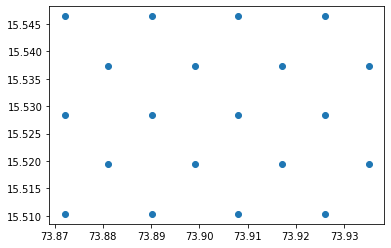

In [16]:
# plots all the points of radius = 1 km
points = pd.read_csv('points.csv')
points_list = [[points.iloc[i,1], points.iloc[i,0]] for i in range(points.shape[0])]
points_list.insert(1,[points_list[0][0], points_list[1][1]])
coordinates = map_points(points_list)
x = [float(i[0]) for i in coordinates]
y = [float(i[1]) for i in coordinates]
plt.scatter(x,y)
print(len(coordinates))

In [17]:
entity_codes = pd.read_csv('entity types.csv')
entity_types = [entity_codes.iloc[i, 0] for i in range(entity_codes.shape[0])]
entity_ids = [entity_codes.iloc[i, 1] for i in range(entity_codes.shape[0])]

# to select only a few POI's 
only_at_indices = [6,9,45,71]
entity_types = [entity_types[i] for i in only_at_indices]
entity_ids = [entity_ids[i] for i in only_at_indices]

In [31]:
# makes the api calls
pwd = os.getcwd() 
api_key = key.api_key
base_url = "http://spatial.virtualearth.net/REST/v1/data/Microsoft/PointsOfInterest?"
for entity_index in range(len(entity_types)):
    count = 0
    e_type = entity_types[entity_index]
    entity_code = entity_ids[entity_index]
    if not os.path.exists(f"json files/{e_type}"):
        os.makedirs(f"json files/{e_type}")
    for i in coordinates:
        to_save = bing_query(i[0], i[1], 1, entity_code, api_key, base_url)
        with open(pwd +f"/json files/{e_type}" + f"/{str(count)}.txt", 'w') as outfile:
            json.dump(to_save, outfile)
        count += 1

In [33]:
# to store the counts
with open(pwd+f"\output\ 1.count.txt", 'w') as counts:
    for entity_index in range(len(entity_types)):
        e_type = entity_types[entity_index]
        entities = []
        for i in range(count):
            with open(pwd +"/json files" + f"/{e_type}/{i}.txt") as f:
                json_data = json.load(f)
                data = json_data.get("d").get("results")
                for j in range(len(data)):
                    entities.append({'Name':data[j]['Name'], 'Address': data[j]['Locality'] +", "+ data[j]['AdminDistrict2'] +", "+ data[j]['AdminDistrict'] +", "+ data[j]['CountryRegion'], 'Postal Code':str(data[j]['PostalCode']), 'Latitude': str(data[j]['Latitude']), 'Longitude': str(data[j]['Longitude'])})
        # removing duplicates
        entities = [dict(i) for i in {tuple(entity.items()) for entity in entities}]
        counts.write(str(len(entities)) + f" {e_type}s\n")
        # writing to output files
        with open(pwd+f"\output\{e_type}.txt", 'w') as f:
            for i in entities:
                f.write('Name - '+i['Name']+'\nAddress - '+i['Address']+'\nPostal Code - '+i['Postal Code']+'\nLatitude - '+i['Latitude']+'\nLongitude - '+i['Longitude']+'\n\n')
        f.close()
    